In [254]:
library(ggplot2)
library(gridExtra)
library(scales)
library(comprehenr)
library(glue)
library(tcltk)

## Exercise 1

The triangular distribution, in the interval $(a, b)$, is given by the following:

$$
 f(X) =
 \begin{cases}
    \frac{2(x-a)}{(b-a)(c-a)} & a \le x < c \\
    \frac{2(b-x)}{(b-a)(b-c)} & c \le x \le b \\
    0 & \text{otherwise}
 \end{cases}
$$

where $c \in [a, b]$

a) plot the function, given the interval $(a, b)$

b) write an algorithm to generate random numbers from the triangular distribution

c) generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve


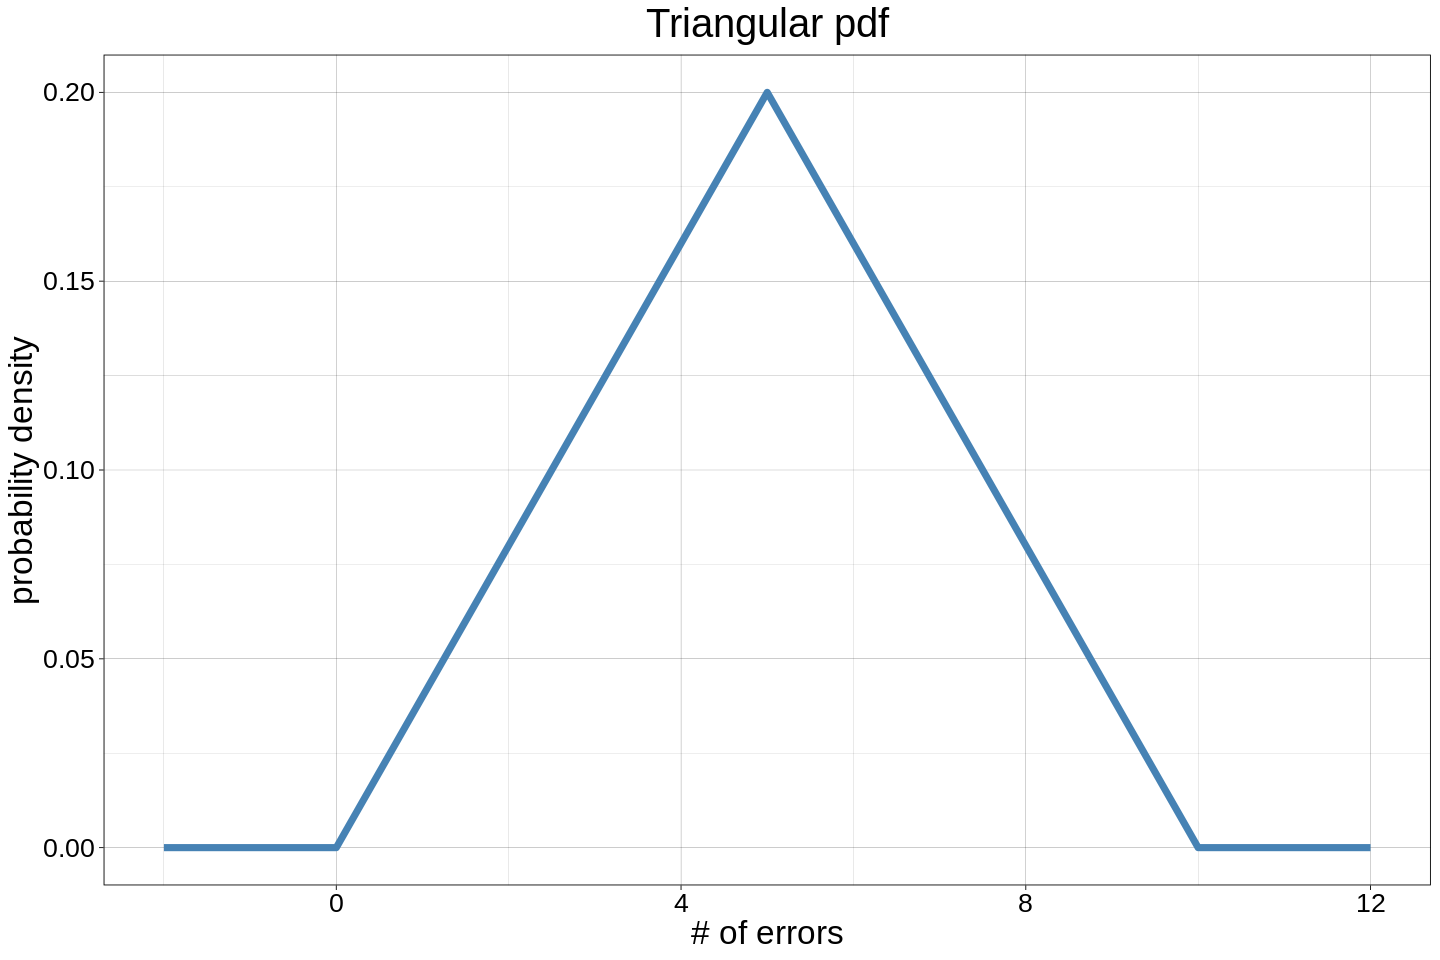

In [7]:
# plot the function, given the interval $(a, b)$
f = function(x, a, b, c){ 
    if( c<=a | c>=b ){
        stop("Error: c must be between a and b")
    }else{
        return(
            ifelse(
                x>=a & x<c, 
                2*(x-a)/((b-a)*(c-a)),
                ifelse(
                    x>=c & x<=b, 
                    2*(b-x)/((b-a)*(b-c)),
                    0
                )
            )
        )
    }
}

a = 0
b = 10
c = 5

x     = seq(-2, 12, 0.1)
y_pdf = f(x, a, b, c)

options(repr.plot.width=12, repr.plot.height=8)
pdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=x, y=y_pdf), color="steelblue", lwd = 2) + 
     #geom_point(aes(x=x, y=y_pdf), color="steelblue", size = 5) +                                                              
     theme(text = element_text(size=20)) +
     ggtitle("Triangular pdf") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability density") +
     xlab("# of errors") 

pdf

In [30]:
# write an algorithm to generate random numbers from the triangular distribution 

## set seed for reproducibility
set.seed(123)

## -> acception rejection method
f_rs = function(n, a, b, c){
    M = f(c, a, b, c)
    sampled_list = c()
    for (i in 1:n){
        repeat{
            u1 = runif(1, a, b)
            u2 = runif(1, 0, M)
            if(f(u1, a, b, c)>u2){
                break;
            }
        }
        sampled_list = c(sampled_list, u1)
    }
    return (sampled_list)
}

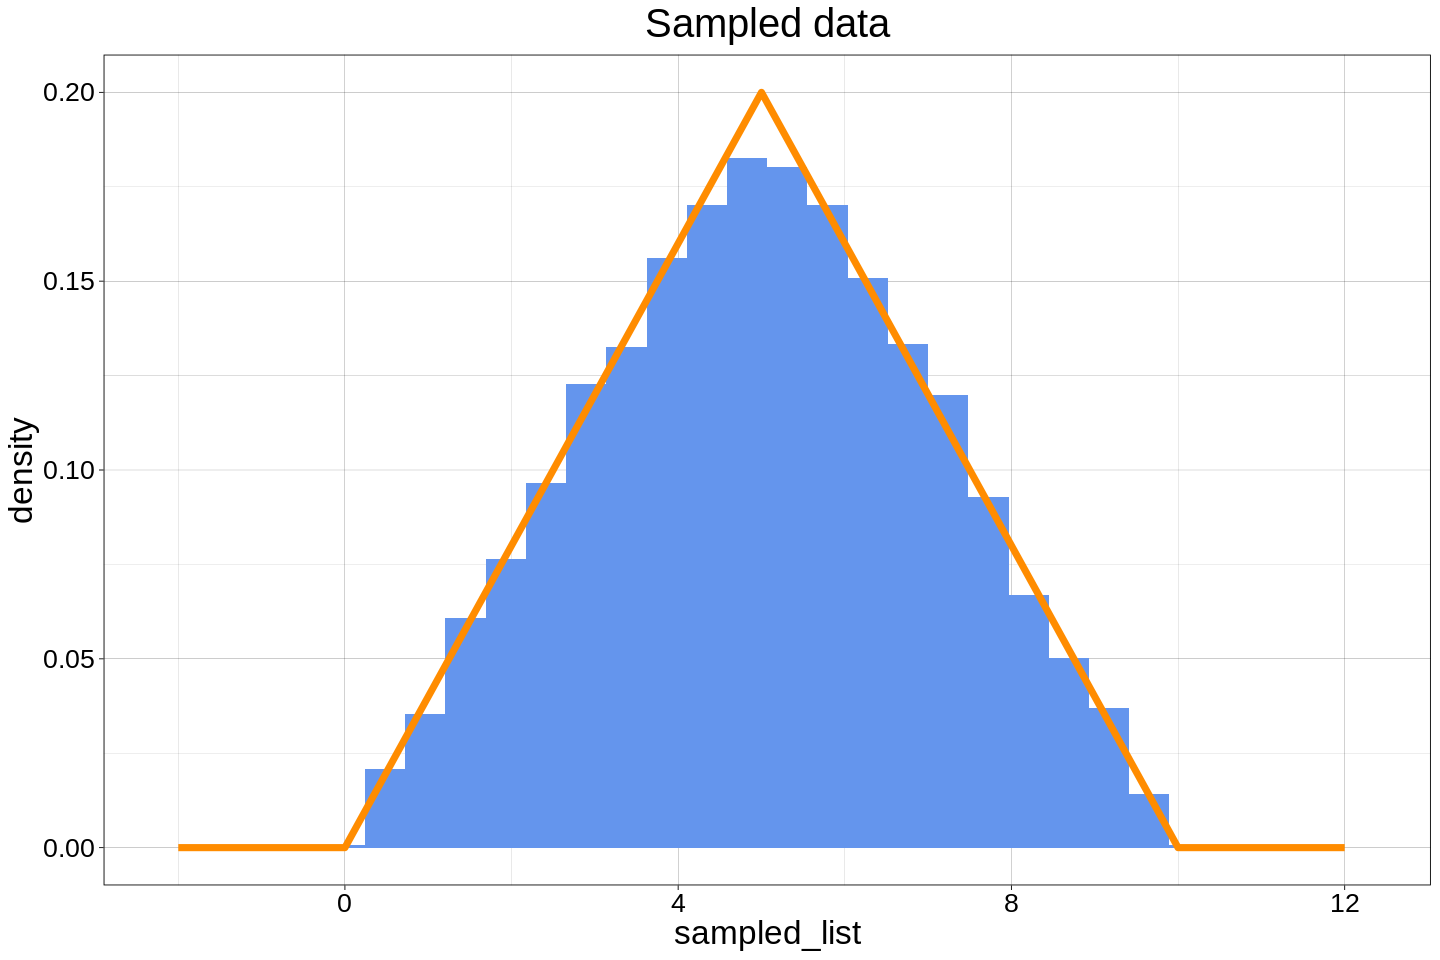

In [37]:
# generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

N = 10000
sampled_list = f_rs(10000, a, b, c)

options(repr.plot.width=12, repr.plot.height=8)                                   
triangular <- ggplot() +   
     theme_linedraw() +                                            
     geom_histogram(aes(x=sampled_list, y=..density..), fill="cornflowerblue", bins = 30) + 
     geom_line(aes(x=x, y=y_pdf), color="dark orange", lwd = 2) +                                                            
     theme(text = element_text(size=20)) +
     ggtitle("Sampled data") +
     theme(plot.title = element_text(hjust = 0.5))
     xlab("")

triangular

## Exercise 2
Define a function:
$$
    G(k) = 1 - F(k) \equiv P(X\ge k)
$$

and plot G(k) and the Markov’s upper bound for:

a) the exponential, $Exp(\lambda=1)$, distribution function

b) the uniform $U(3,5)$, distribution function

c) the binomial, $Bin(n=1, p=1/2)$, distribution function

d) a Poisson, $Poi(\lambda=1/2)$, distribution function


In [140]:
G            = function(k, fname){return (1-match.fun(fname)(k))}
markov_bound = function(k, mean){ return (mean/k)}

# exponential
r = 1
exp_cdf  = function(k){ return(pexp(q=k, r=r))}
exp_mean = 1/r

# uniform
a = 3
b = 5
unif_cdf  = function(k){ return(punif(q=k, min=a, max=b))}
unif_mean = (a+b)/2

# binomial
n = 1
prob = 1/2
bin_cdf  = function(k){ return(pbinom(q=k, size=n, prob=prob))}
bin_mean = n*prob

# poisson
lambda = 1/2
poi_cdf  = function(k){ return(ppois(q=k, lambda=lambda))}
poi_mean = lambda

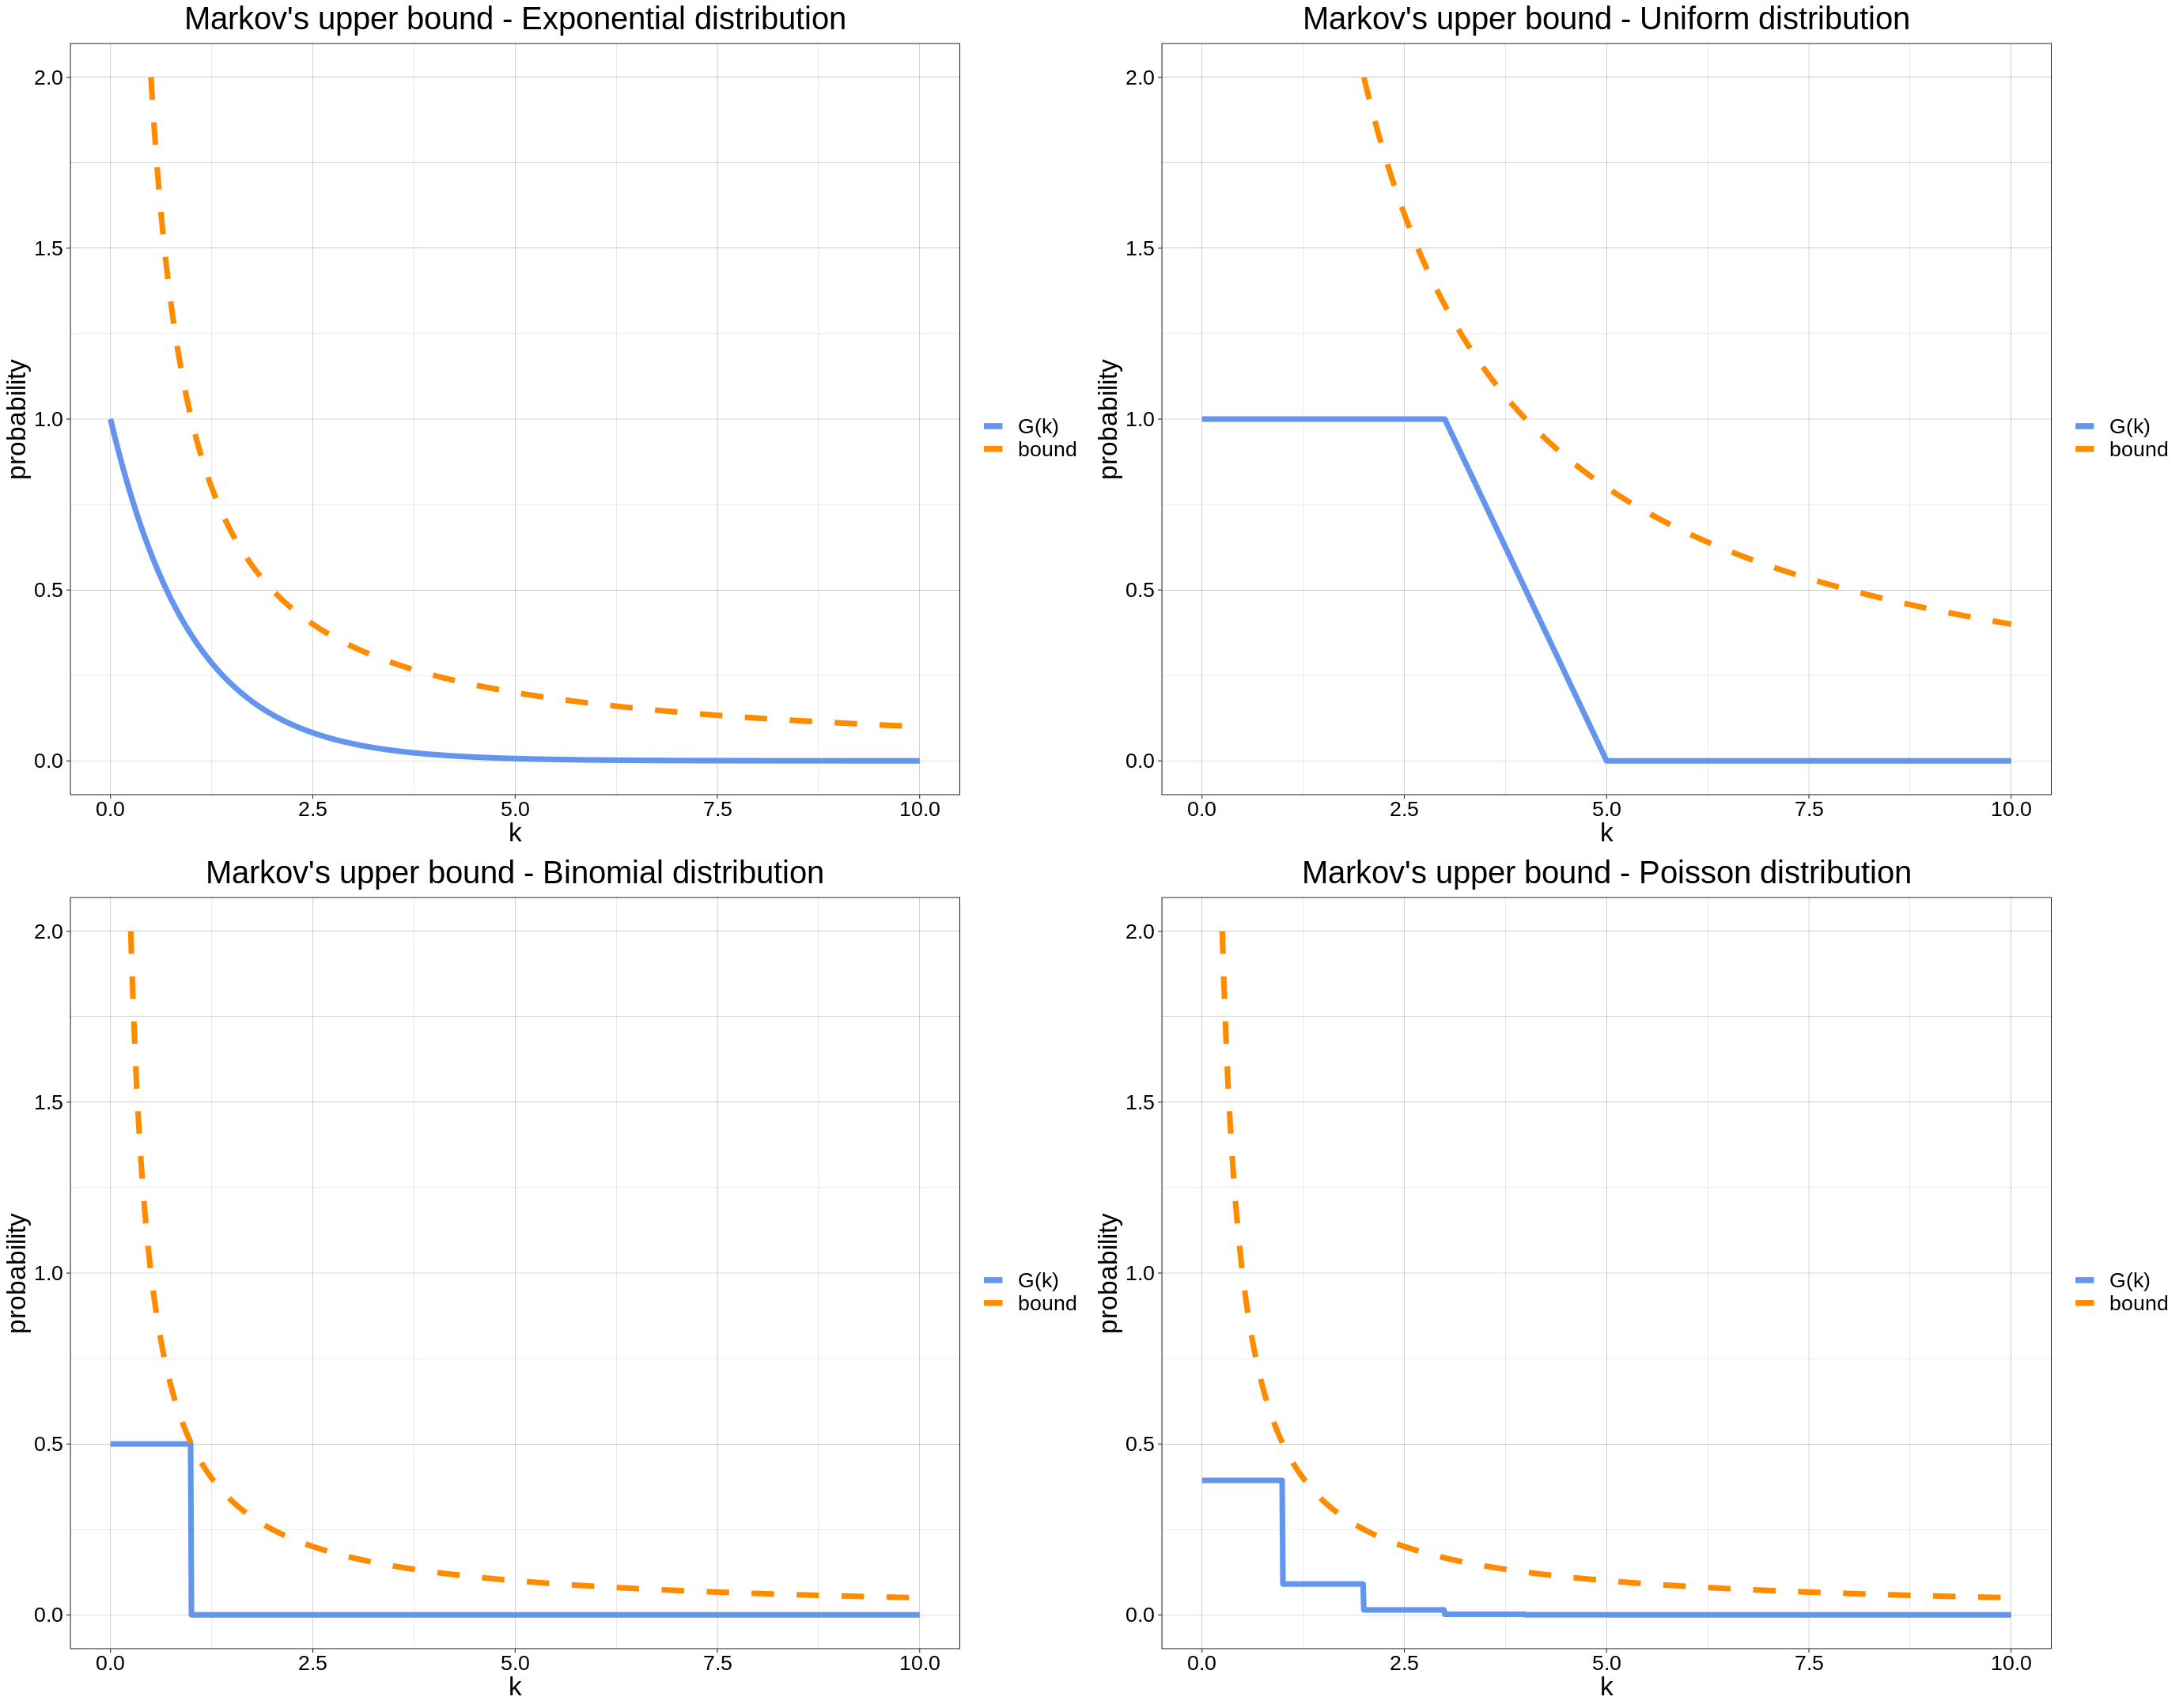

In [151]:
cols = c("G(k)"="cornflowerblue", "bound"="darkorange")

name  = c("Exponential", "Uniform", "Binomial", "Poisson")
cdf   = c('exp_cdf', 'unif_cdf', 'bin_cdf', 'poi_cdf')
mean_ = c(exp_mean, unif_mean, bin_mean, poi_mean)

x = seq(0, 10, 0.01)

options(repr.plot.width=23, repr.plot.height=18)   
plots = list()
for (i in 1:length(name)){
     p <- ggplot() +   
          theme_linedraw() +                                            
          geom_line(aes(x=x, y=G(x, cdf[i]), color="G(k)"),  lwd=2) +        
          geom_line(aes(x=x, y=markov_bound(x, mean_[i]), color="bound"),  linetype="dashed", lwd=2) +                                                      
          theme(text = element_text(size=20)) +
          ggtitle(paste("Markov's upper bound -", name[i], "distribution")) +
          theme(plot.title = element_text(hjust = 0.5))  +
          scale_color_manual(name="",
                         values=cols) +
          ylab("probability") +
          ylim(0, 2) +
          xlab("k")
          
     plots[[i]] = ggplotGrob(p)
}

grid.arrange(grobs=plots, ncol=2)

## Exercise 3

Using R to show, with a plot, that Chebyshev’s inequality is an upper bound to the following distributions:

and plot G(k) and the Markov’s upper bound for:

a) a normal distribution, $N(\mu=3, \sigma=5)$

b) an exponential distribution, $Exp(\lambda = 1)$

c) a uniform distribution $U(1-\sqrt 2, 1+\sqrt 2)$

d) a Poisson, $Poi(\lambda=1/3)$, distribution function

-> _Solution_

Starting from the Chebyshev's inequality:

$$
P(|X-\mu|\geq k\sigma)\leq \frac{1}{k^2}\Rightarrow P(|X-\mu|<k\sigma)\geq1-\frac{1}{k^2}
$$ 

The l.h.s. can be rewritten defining G as: 

$$
G(k, \mu, \sigma) \equiv 1- P(|X-\mu|<k\sigma)=1- P(X<\mu+k\sigma) + P(X<\mu-k\sigma)
$$ 

In [164]:
G               = function(k, mu, sigma, fname){return (1-match.fun(fname)(k*sigma + mu)+ match.fun(fname)(-k*sigma + mu))}
chebyshev_bound = function(k){ return (1/k^2)}

# normal
mu    = 3
sigma = 5
norm_cdf  = function(k){ return(pnorm(q=k, mean=mu, sd=sigma))}
norm_mean = mu
norm_var  = sigma

# exponential
r = 1
exp_cdf  = function(k){ return(pexp(q=k, r=r))}
exp_mean = 1/r
exp_var  = 1/r^2

# uniform
a = 1-sqrt(2)
b = 1+sqrt(2)
unif_cdf  = function(k){ return(punif(q=k, min=a, max=b))}
unif_mean = (a+b)/2
unif_var  = (b-a)^2/12

# poisson
lambda = 1/3
poi_cdf  = function(k){ return(ppois(q=k, lambda=lambda))}
poi_mean = lambda
poi_var  = sqrt(lambda)

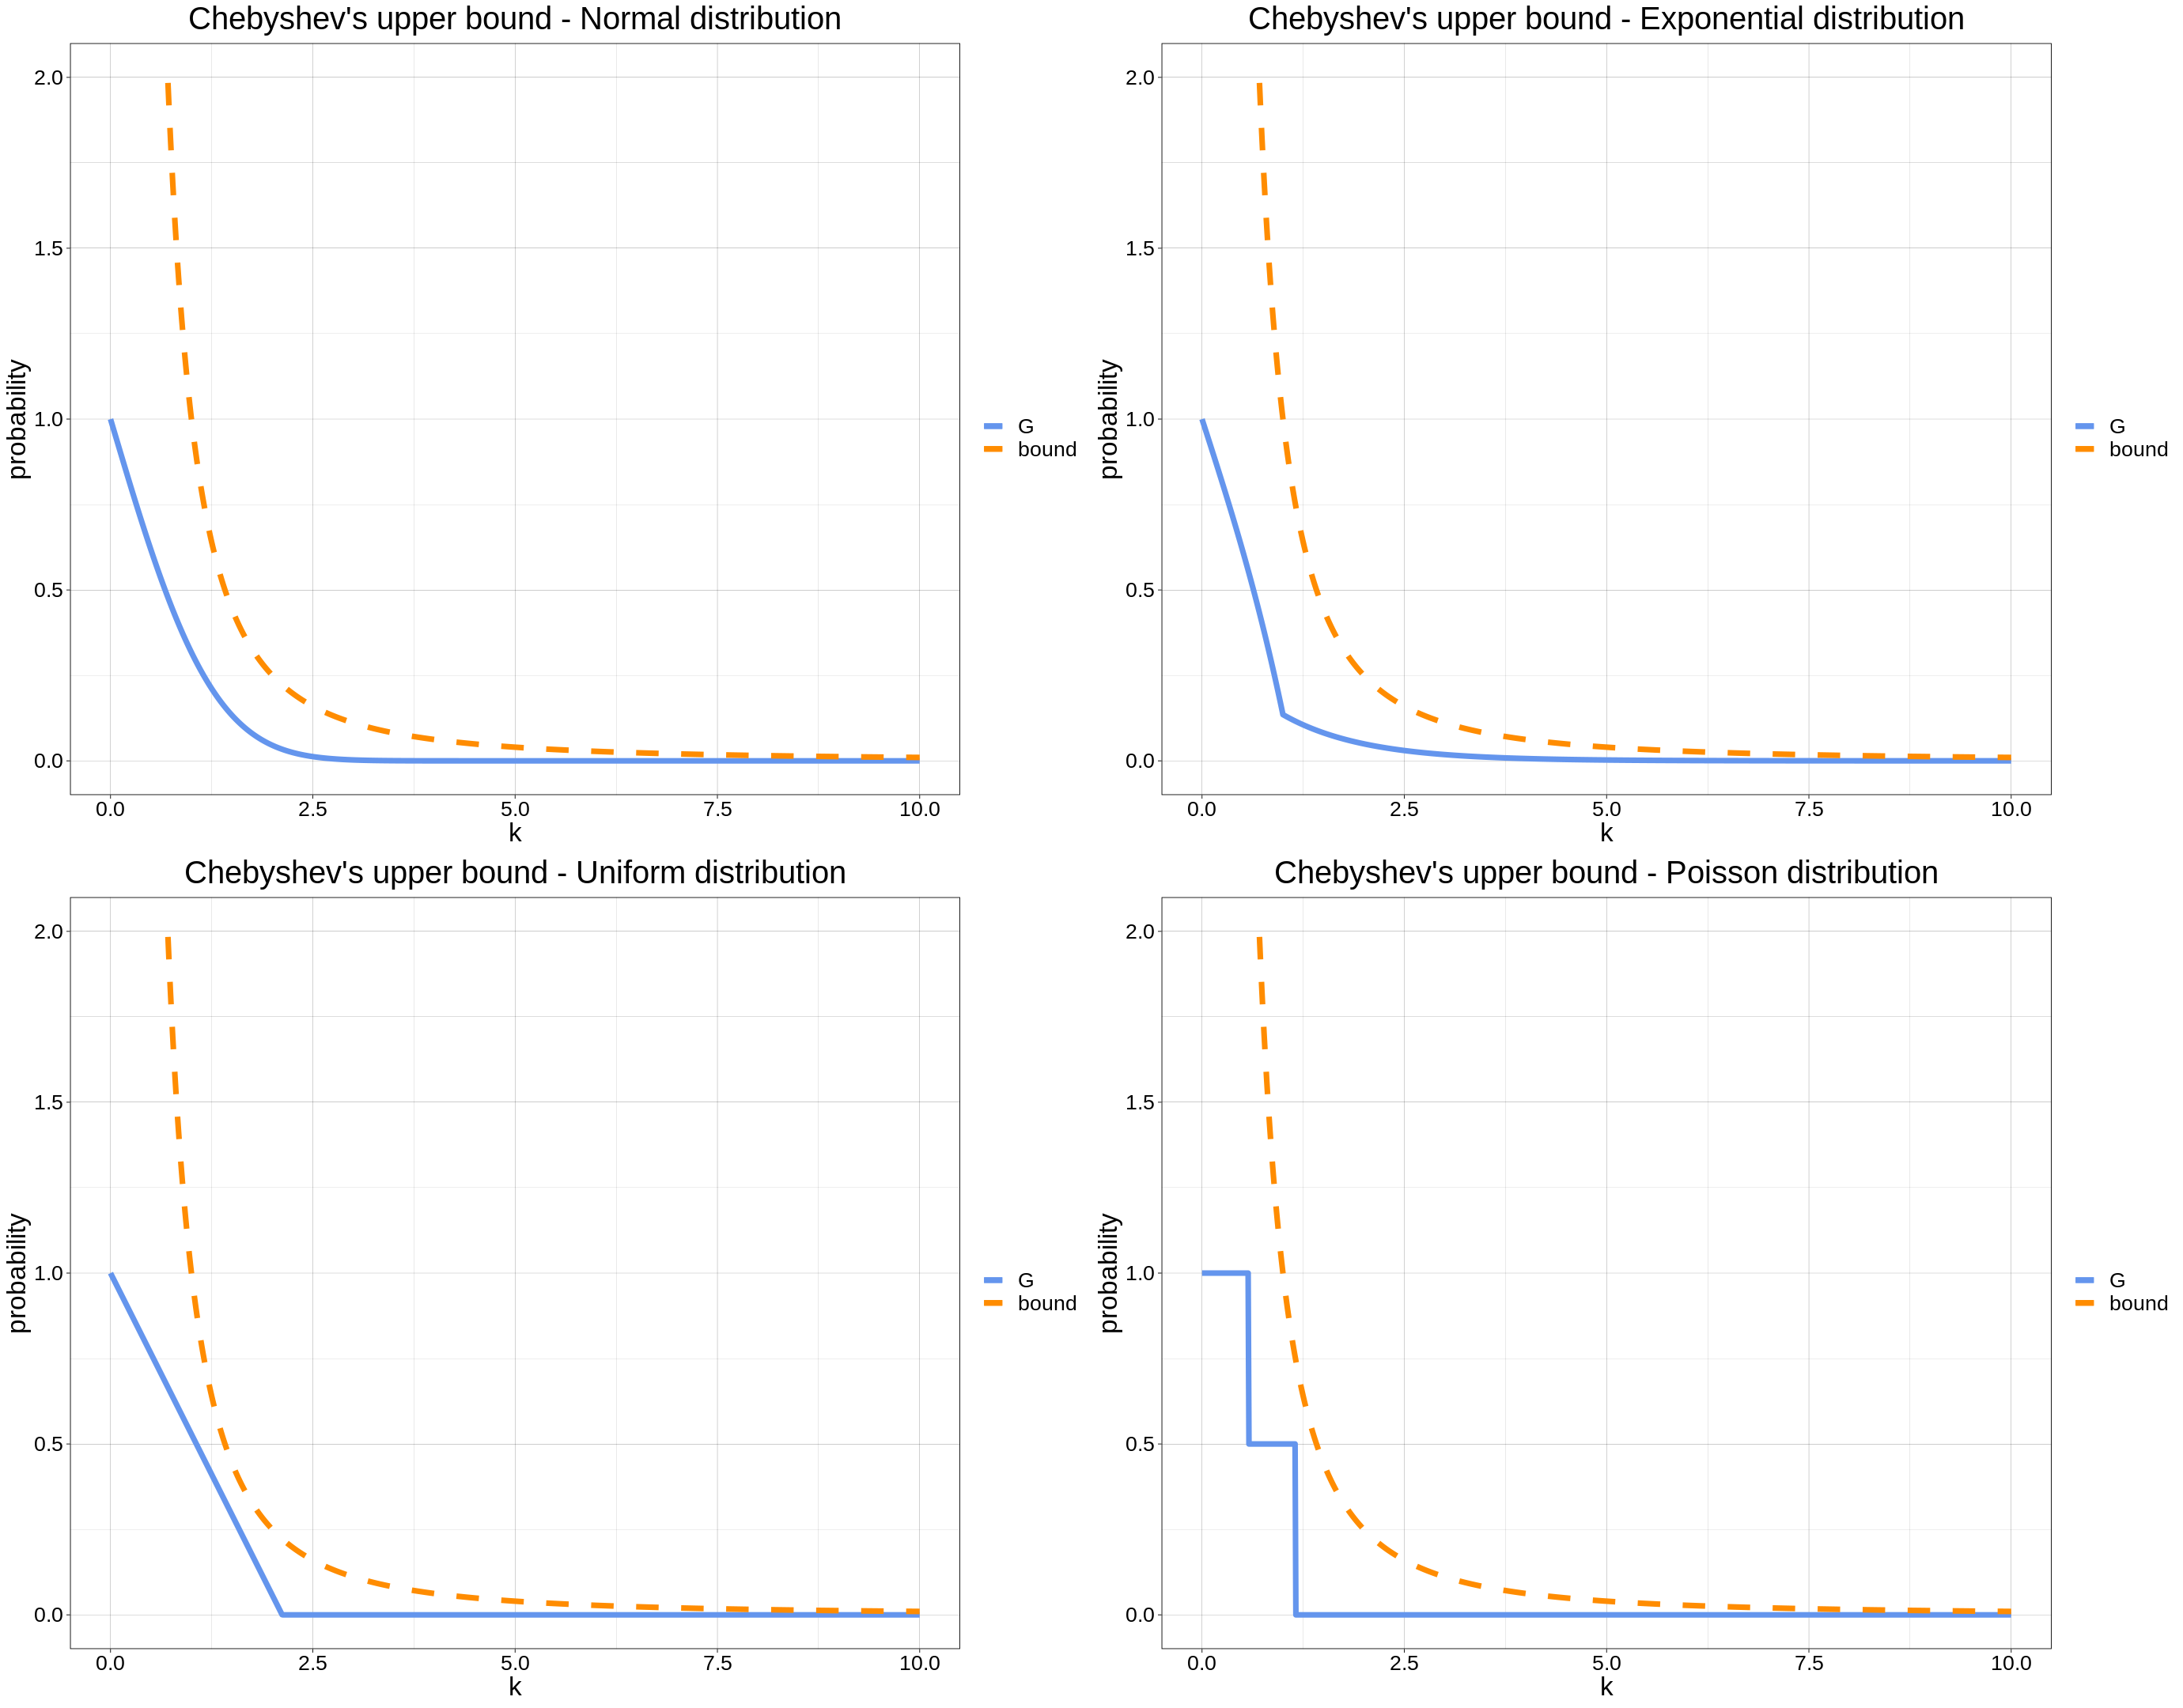

In [165]:
cols = c("G"="cornflowerblue", "bound"="darkorange")

name  = c("Normal", "Exponential", "Uniform", "Poisson")
cdf   = c('norm_cdf', 'exp_cdf', 'unif_cdf', 'bin_cdf', 'poi_cdf')
mean_ = c(norm_mean, exp_mean, unif_mean, poi_mean)
var   = c(norm_var, exp_var, unif_var, poi_var)

x = seq(0, 10, 0.01)

options(repr.plot.width=23, repr.plot.height=18)   
plots = list()
for (i in 1:length(name)){
     p <- ggplot() +   
          theme_linedraw() +                                            
          geom_line(aes(x=x, y=G(x, mean_[i], var[i], cdf[i]), color="G"),  lwd=2) +        
          geom_line(aes(x=x, y=chebyshev_bound(x), color="bound"),  linetype="dashed", lwd=2) +                                                      
          theme(text = element_text(size=20)) +
          ggtitle(paste("Chebyshev's upper bound -", name[i], "distribution")) +
          theme(plot.title = element_text(hjust = 0.5))  +
          scale_color_manual(name="",
                         values=cols) +
          ylab("probability") +
          ylim(0, 2) +
          xlab("k")
          
     plots[[i]] = ggplotGrob(p)
}

grid.arrange(grobs=plots, ncol=2)